# dependencies

In [2]:
import pandas as pd

# creating df

In [3]:
df = pd.read_csv("cyberpunk_2077_filtered.csv")
df.head()

,language,review,updated,voted_up,votes_up,votes_funny,steam_purchase,playtime_at_review
0,english,It's very fun. I don't usually like open world...,2023-12-13,True,0,0,True,2452
1,french,loved it before 2.0\n\n\n\n\ndon't like it any...,2023-12-13,False,0,0,False,3349
2,schinese,真的值得体验一下,2023-12-13,True,0,0,True,2116
3,english,Fun game,2023-12-13,True,0,0,True,10324
4,english,cyberpunk,2023-12-13,True,0,0,True,1580


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612380 entries, 0 to 612379
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   language            612380 non-null  object
 1   review              612380 non-null  object
 2   updated             612380 non-null  object
 3   voted_up            612380 non-null  bool  
 4   votes_up            612380 non-null  int64 
 5   votes_funny         612380 non-null  int64 
 6   steam_purchase      612380 non-null  bool  
 7   playtime_at_review  612380 non-null  int64 
dtypes: bool(2), int64(3), object(3)
memory usage: 29.2+ MB


# parsing data

In [5]:
# converting the "updated" column to datetime

df["updated"] = pd.to_datetime(df["updated"])
df.head()

,language,review,updated,voted_up,votes_up,votes_funny,steam_purchase,playtime_at_review
0,english,It's very fun. I don't usually like open world...,2023-12-13,True,0,0,True,2452
1,french,loved it before 2.0\n\n\n\n\ndon't like it any...,2023-12-13,False,0,0,False,3349
2,schinese,真的值得体验一下,2023-12-13,True,0,0,True,2116
3,english,Fun game,2023-12-13,True,0,0,True,10324
4,english,cyberpunk,2023-12-13,True,0,0,True,1580


# data exploration

In [6]:
print(df["updated"].min())
print(df["updated"].max())

2020-12-10 00:00:00
2023-12-13 00:00:00


In [30]:
upvote_rate = df.groupby([df['updated'].dt.year, df['updated'].dt.month])["voted_up"].mean()
upvote_rate

updated  updated
2020     12         0.796547
2021     1          0.759931
         2          0.697995
         3          0.604137
         4          0.679466
         5          0.664692
         6          0.644182
         7          0.693751
         8          0.668697
         9          0.725406
         10         0.727986
         11         0.837535
         12         0.725762
2022     1          0.769399
         2          0.766254
         3          0.729357
         4          0.809488
         5          0.833111
         6          0.800058
         7          0.821162
         8          0.841162
         9          0.865291
         10         0.885975
         11         0.921670
         12         0.888151
2023     1          0.845213
         2          0.847692
         3          0.871475
         4          0.801884
         5          0.861364
         6          0.796880
         7          0.870963
         8          0.875830
         9          0.8464

<Axes: xlabel='updated,updated'>

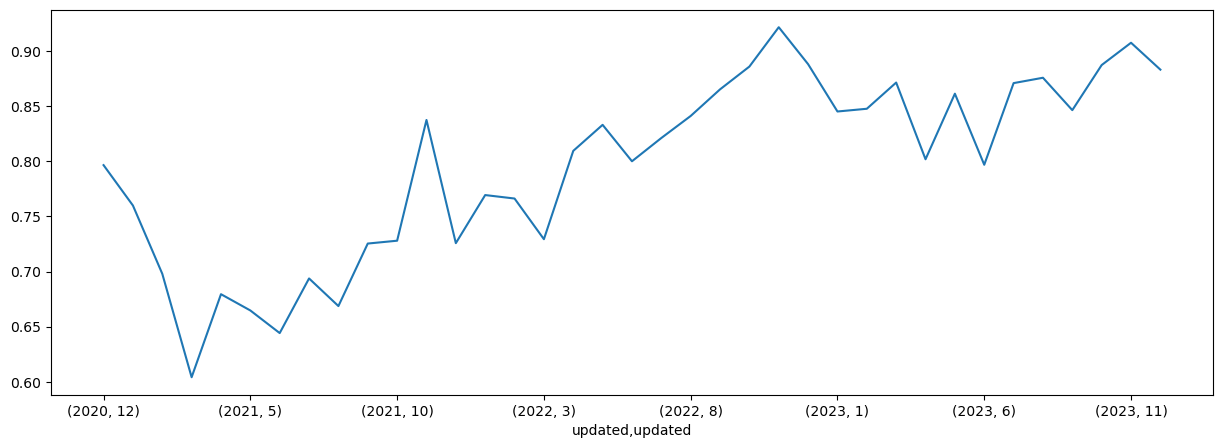

In [22]:
upvote_rate.plot(kind="line", figsize=(15, 5))

In [36]:
df["playtime_at_review"].max()

831446

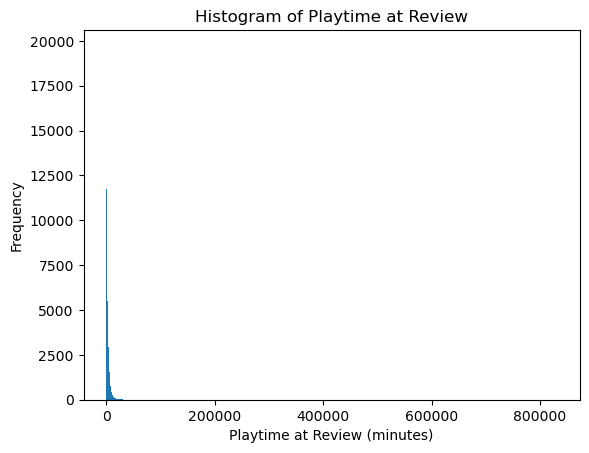

In [38]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(df['playtime_at_review'], bins=int(df['playtime_at_review'].max() / 60))

# Add labels and title
plt.xlabel('Playtime at Review (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Playtime at Review')

# Show the histogram
plt.show()


C:\Users\Dahong Luo\AppData\Local\Temp\ipykernel_115084\1981267456.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_playtime_group = df.groupby(play_time_series)['voted_up'].mean()


<Axes: xlabel='playtime_at_review'>

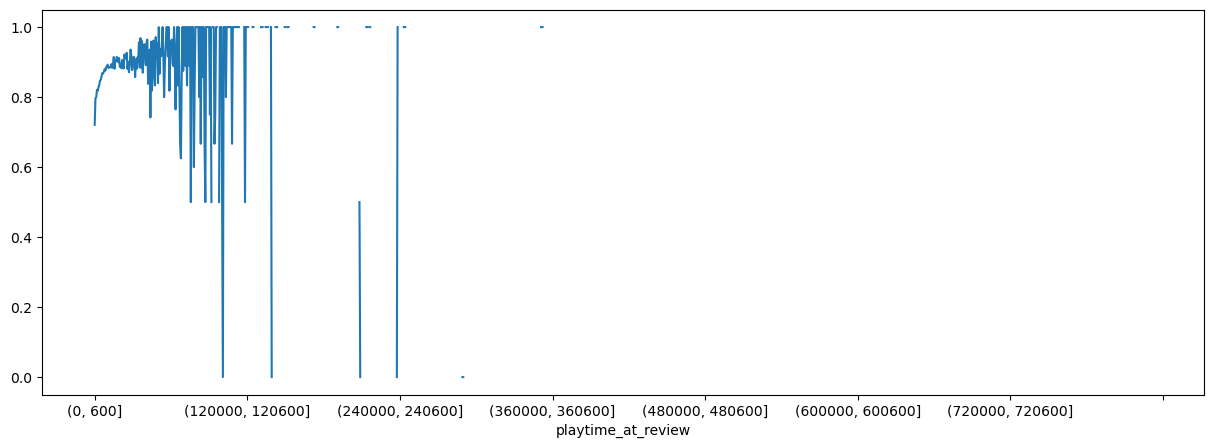

In [42]:
# Define the bin edges
bin_edges = range(0, int(df['playtime_at_review'].max()) + 6001, 6000)

# Group the data by playtime intervals
play_time_series = pd.cut(df['playtime_at_review'], bins=bin_edges)

df_playtime_group = df.groupby(play_time_series)['voted_up'].mean()
# Count the number of reviews in each playtime group
df_playtime_group.plot(kind='line', figsize=(15, 5))
